<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#初始化" data-toc-modified-id="初始化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>初始化</a></span></li><li><span><a href="#读取数据" data-toc-modified-id="读取数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>读取数据</a></span></li><li><span><a href="#查看同一地点同一设备的强度情况" data-toc-modified-id="查看同一地点同一设备的强度情况-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>查看同一地点同一设备的强度情况</a></span></li><li><span><a href="#多维向量对比结果" data-toc-modified-id="多维向量对比结果-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>多维向量对比结果</a></span><ul class="toc-item"><li><span><a href="#建立pci的全表" data-toc-modified-id="建立pci的全表-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>建立pci的全表</a></span></li><li><span><a href="#匹配函数" data-toc-modified-id="匹配函数-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>匹配函数</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>结论</a></span></li><li><span><a href="#不同时间的匹配结果" data-toc-modified-id="不同时间的匹配结果-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>不同时间的匹配结果</a></span></li><li><span><a href="#随机匹配结果" data-toc-modified-id="随机匹配结果-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>随机匹配结果</a></span></li></ul></li></ul></div>

## 初始化

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
    import os
    import shutil

## 读取数据

In [303]:
def getResult(filedir1):    
    result=pd.DataFrame()
    count=-1
    timefileindex=0
    togglefiletime=True
    for parent, dirnames, filenames in os.walk(filedir1):# os.walk返回迭代对象，文件路径，路径名字，文件名字
        for filename in filenames:
            if filename.endswith('txt'):
                fullfilename=os.path.join(parent,filename) 
                if togglefiletime:
                    timefile=filename[:-11]
                    togglefiletime=False
                with open(fullfilename,'r') as f:
                #     print (f.readlines()) 
                    for line in f.readlines():
                        if line=='\n':
                            count=count+1
                            result.loc[count,'PosIndex']=parent[-1]
                            if filename[:-11]!=timefile:
                                timefileindex=timefileindex+1
                                timefile=filename[:-11]
                            result.loc[count,'time']=int(timefileindex)%5
                            #result.loc[count,'ddtime']=int(timefileindex)%5
                        else:
                            txttmp=line[:-1].split('=')
                            result.loc[count,txttmp[0]]=float(txttmp[-1]) 
    return result.copy()

In [ ]:
filedir1='/media/aaron/新加卷1/工作记录/项目产出及记录/基站定位方案/mate'

In [248]:
data1=result.copy()#vivo

In [256]:
data2=result.copy()#mate
data2.head()

,PosIndex,time,mcc,mnc,ci,pci,tac,dbm,asuLevel,timingAdvance,level
0,1,0.0,460.0,1.0,7.826819e+06,395.0,4.345000e+03,-91.0,49.0,2.147484e+09,4.0
1,1,0.0,460.0,1.0,2.147484e+09,317.0,2.147484e+09,-100.0,40.0,2.147484e+09,3.0
2,1,0.0,460.0,1.0,2.147484e+09,86.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
3,1,0.0,460.0,1.0,2.147484e+09,316.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
4,1,0.0,460.0,1.0,2.147484e+09,287.0,2.147484e+09,-103.0,37.0,2.147484e+09,3.0


In [377]:
data3=getResult('/media/aaron/新加卷1/工作记录/项目产出及记录/基站定位方案/vivo2')#第二天的

In [379]:
data4=getResult('/media/aaron/新加卷1/工作记录/项目产出及记录/基站定位方案/mate2')#第二天的

In [176]:
data1.columns

Index(['PosIndex', 'time', 'mcc ', 'mnc ', 'ci ', 'pci ', 'tac', 'dbm',
       'asuLevel', 'timingAdvance', 'level'],
      dtype='object')

In [130]:
test=data1[(data1['PosIndex']=='1')].groupby(by='pci ')

## 查看同一地点同一设备的强度情况

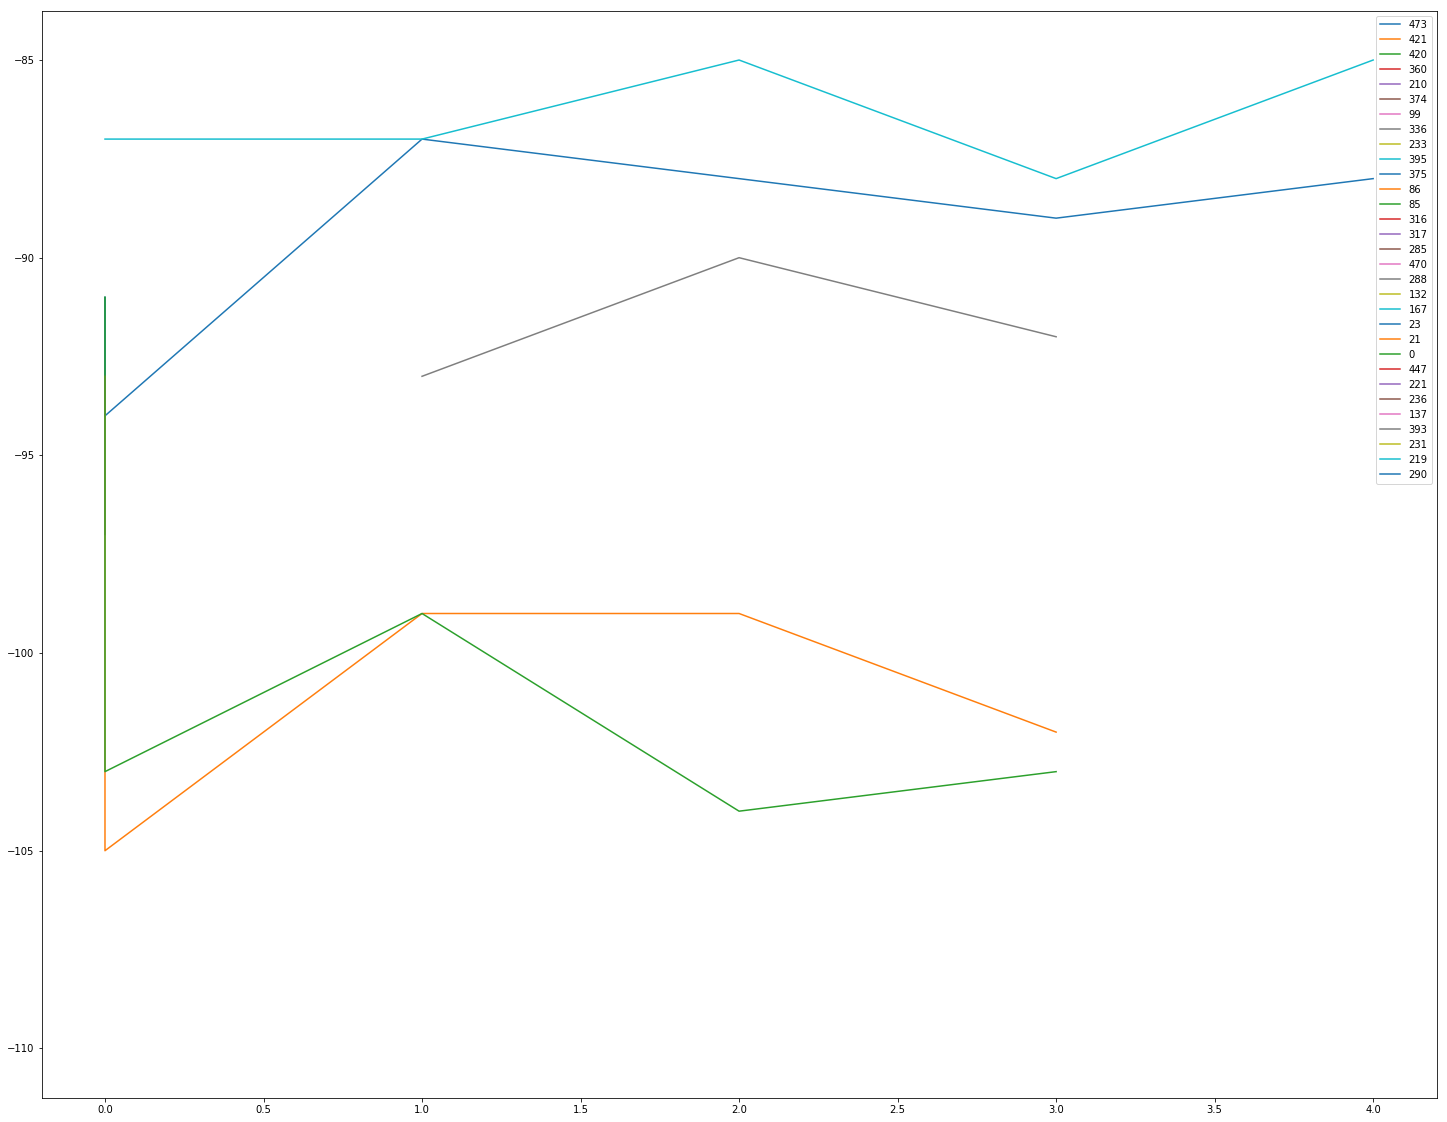

In [457]:
datatmp=data4.copy()
plt.figure(figsize=(25,20))
for i in PciList:
    plt.plot(datatmp[(datatmp['PosIndex']=='1')&(datatmp['pci ']==i)].loc[:,'time'].values.tolist(),datatmp[(datatmp['PosIndex']=='1')&(datatmp['pci ']==i)].loc[:,'dbm'].values.tolist(),label=i)
plt.legend()

In [180]:
i=360.0
#data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist()
data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'dbm'].values.tolist()

[-105.0, -105.0, -105.0, -105.0, -104.0]

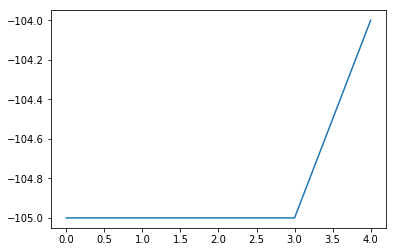

In [181]:
i=360.0
#data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist()
plt.plot(data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist(),data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'dbm'].values.tolist(),label=i)

## 多维向量对比结果

### 建立pci的全表

In [476]:
PciList=data1.drop_duplicates(subset='pci ').loc[:,'pci '].values.tolist()
PciList2=data2.drop_duplicates(subset='pci ').loc[:,'pci '].values.tolist()
PciList3=data3.drop_duplicates(subset='pci ').loc[:,'pci '].values.tolist()
PciList4=data4.drop_duplicates(subset='pci ').loc[:,'pci '].values.tolist()
print (len(PciList),len(PciList2),len(PciList3),len(PciList4))

31 36 33 37


In [479]:
PciList.extend(PciList4)
print (len(PciList),len(PciList2),len(PciList3),len(PciList4))

137 36 33 37


In [483]:
len(PciList)

137

In [484]:
PosIndexList=data1.drop_duplicates(subset='PosIndex').loc[:,'PosIndex'].values.tolist()
TimeIndexList=data1.drop_duplicates(subset='time').loc[:,'time'].values.tolist()

In [261]:
data1result=np.zeros((len(PosIndexList),len(TimeIndexList),len(PciList)))
for item in data1.iterrows():
    data1result[PosIndexList.index(item[1]['PosIndex']),TimeIndexList.index(item[1]['time']),PciList.index(item[1]['pci '])]=item[1]['dbm']

In [262]:
data2result=np.zeros((len(PosIndexList),len(TimeIndexList),len(PciList)))
for item in data2.iterrows():
    try:
        data2result[PosIndexList.index(item[1]['PosIndex']),TimeIndexList.index(item[1]['time']),PciList.index(item[1]['pci '])]=item[1]['dbm']
    except Exception as e:
        print (e)

287.0 is not in list
287.0 is not in list
287.0 is not in list
352.0 is not in list
351.0 is not in list
468.0 is not in list
378.0 is not in list
468.0 is not in list
352.0 is not in list
378.0 is not in list
471.0 is not in list
352.0 is not in list
241.0 is not in list
352.0 is not in list
268.0 is not in list
241.0 is not in list
352.0 is not in list
268.0 is not in list
241.0 is not in list
352.0 is not in list
268.0 is not in list
241.0 is not in list
84.0 is not in list
315.0 is not in list
315.0 is not in list
352.0 is not in list
268.0 is not in list
315.0 is not in list
352.0 is not in list
268.0 is not in list
352.0 is not in list
268.0 is not in list
352.0 is not in list
268.0 is not in list
352.0 is not in list
351.0 is not in list
468.0 is not in list
352.0 is not in list
351.0 is not in list
287.0 is not in list
352.0 is not in list
351.0 is not in list
287.0 is not in list
352.0 is not in list
351.0 is not in list
352.0 is not in list
498.0 is not in list
268.0 is not i

25


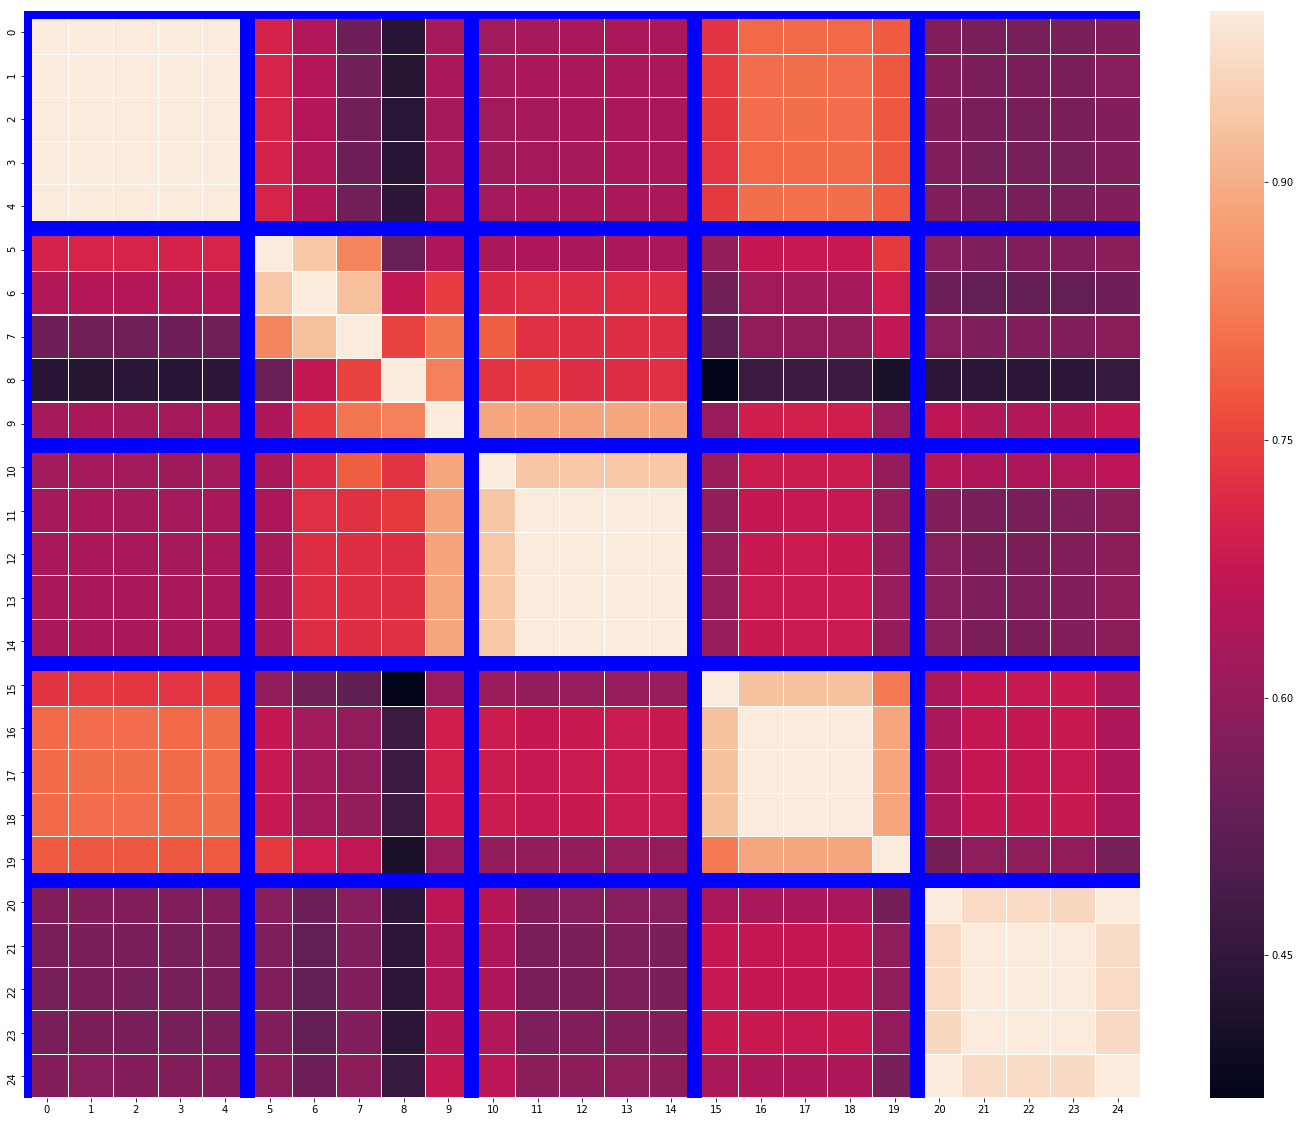

In [294]:
tmpresult=[]
for ind1,poiIndex in enumerate(PosIndexList):
    for ind2,timeIndex in enumerate(TimeIndexList):
        tmpresult.append(data1result[ind1,ind2,:])
print (len(tmpresult))        
dataCorSelf=np.zeros((len(tmpresult),len(tmpresult)))
for ind1,item in enumerate(tmpresult):
    for ind2,jitem in enumerate(tmpresult):    
        dataCorSelf[ind1,ind2]=(tmpresult[ind1]*tmpresult[ind2]).sum()/np.linalg.norm(tmpresult[ind1])/np.linalg.norm(tmpresult[ind2]) 
plt.figure(figsize=(25,20))
sns.heatmap(dataCorSelf,linewidths = 0.05)
for item in range(5):
    plt.plot([item*5,item*5],[25,0],'-',c='blue',lw=15)
    plt.plot([25,0],[item*5,item*5],'-',c='blue',lw=15)

tmp2result=[]
for ind1,poiIndex in enumerate(PosIndexList):
    for ind2,timeIndex in enumerate(TimeIndexList):
        tmp2result.append(data2result[ind1,ind2,:])
print (len(tmp2result))        
dataCorSelf=np.zeros((len(tmpresult),len(tmpresult)))
for ind1,item in enumerate(tmpresult):
    for ind2,jitem in enumerate(tmp2result):    
        dataCorSelf[ind1,ind2]=(tmpresult[ind1]*tmp2result[ind2]).sum()/np.linalg.norm(tmpresult[ind1])/np.linalg.norm(tmp2result[ind2]) 
plt.figure(figsize=(25,20))
sns.heatmap(dataCorSelf)
for item in range(5):
    plt.plot([item*5,item*5],[25,0],'-',c='blue',lw=15)
    plt.plot([25,0],[item*5,item*5],'-',c='blue',lw=15)

### 匹配函数

In [395]:
#建立误差矩阵
errorMatrix=np.zeros((5,5))

In [398]:
errorMatrix

array([[ 0.        ,  7.        , 14.        , 17.4642492 , 14.76482306],
       [ 7.        ,  0.        ,  7.        , 16.        , 13.        ],
       [14.        ,  7.        ,  0.        , 17.4642492 , 14.76482306],
       [17.4642492 , 16.        , 17.4642492 ,  0.        , 29.        ],
       [14.76482306, 13.        , 14.76482306, 29.        ,  0.        ]])

In [397]:
errorMatrix[1,0]=errorMatrix[0,1]=7
errorMatrix[2,0]=errorMatrix[0,2]=14
errorMatrix[3,0]=errorMatrix[0,3]=np.sqrt(16*16+7*7)
errorMatrix[4,0]=errorMatrix[0,4]=np.sqrt(13*13+7*7)
errorMatrix[2,1]=errorMatrix[1,2]=7
errorMatrix[3,1]=errorMatrix[1,3]=16
errorMatrix[4,1]=errorMatrix[1,4]=13
errorMatrix[3,2]=errorMatrix[2,3]=np.sqrt(16*16+7*7)
errorMatrix[4,2]=errorMatrix[2,4]=np.sqrt(13*13+7*7)
errorMatrix[4,3]=errorMatrix[3,4]=16+13

In [485]:
def getMultiVector(data):
    data2result=np.zeros((len(PosIndexList),len(TimeIndexList),len(PciList)))
    for item in data.iterrows():
        try:
            data2result[PosIndexList.index(item[1]['PosIndex']),TimeIndexList.index(item[1]['time']),PciList.index(item[1]['pci '])]=item[1]['dbm']
        except Exception as e:
            print (e)
    tmpresult=[]
    for ind1,poiIndex in enumerate(PosIndexList):
        for ind2,timeIndex in enumerate(TimeIndexList):
            tmpresult.append(data2result[ind1,ind2,:])
    print (len(tmpresult))
    return tmpresult.copy()
def matchTwoVec(vec1,vec2):       
    dataCorSelf=np.zeros((len(vec1),len(vec2)))
    matchSituation=np.zeros((len(vec1),5))
    for ind1,item in enumerate(vec1):
        for ind2,jitem in enumerate(vec2):    
            dataCorSelf[ind1,ind2]=(item*jitem).sum()/np.linalg.norm(item)/np.linalg.norm(jitem) 
    plt.figure(figsize=(25,20))
    sns.heatmap(dataCorSelf)
    for item in range(5):
        plt.plot([item*5,item*5],[25,0],'-',c='blue',lw=15)
        plt.plot([25,0],[item*5,item*5],'-',c='blue',lw=15)
    for index in range(len(vec1)):
        matchSituation[index,0]=int(index/5)
        matchSituation[index,1]=int(np.argmax(dataCorSelf[index,:])/5)
        matchSituation[index,2]=np.max(dataCorSelf[index,:])
        matchSituation[index,3]=errorMatrix[int(matchSituation[index,0]),int(matchSituation[index,1])]
#         print ('%d is match %d likehood=%.3f'%(index,matchSituation[index,1],matchSituation[index,2]))
        if matchSituation[index,0]==matchSituation[index,1]:
            matchSituation[index,4]=1
        else:
            matchSituation[index,4]=0   
    tr=matchSituation[:,4].sum()*1.0/len(vec1)
    print ('match right is %.3f'%tr)
    meanError=matchSituation[:,3].mean()
    print ('error is %.3f'%meanError)
    print (tr,meanError)
    return dataCorSelf,matchSituation,tr

### 结论

1. 手机设备自身与自身配合，信号是较为稳定的，相似度较高
2. 手机相互设备之间，虽有干扰，但是仍然具有一定的匹配度
3. 这里最近的距离是接近8m，最远的接近30m，区分度比较稳定的
4. 使用了双卡双待的手机，可以完成其中很大一部分的信息
5. 明天测试是否单卡手机仍然有效
6. 测试不同时间的定位稳定性

### 不同时间的匹配结果

In [486]:
matchVector1=getMultiVector(data1)
matchVector2=getMultiVector(data2)
matchVector3=getMultiVector(data3)
matchVector4=getMultiVector(data4)

25
25
25
25


match right is 0.280
error is 9.883
0.28 9.883442761723932


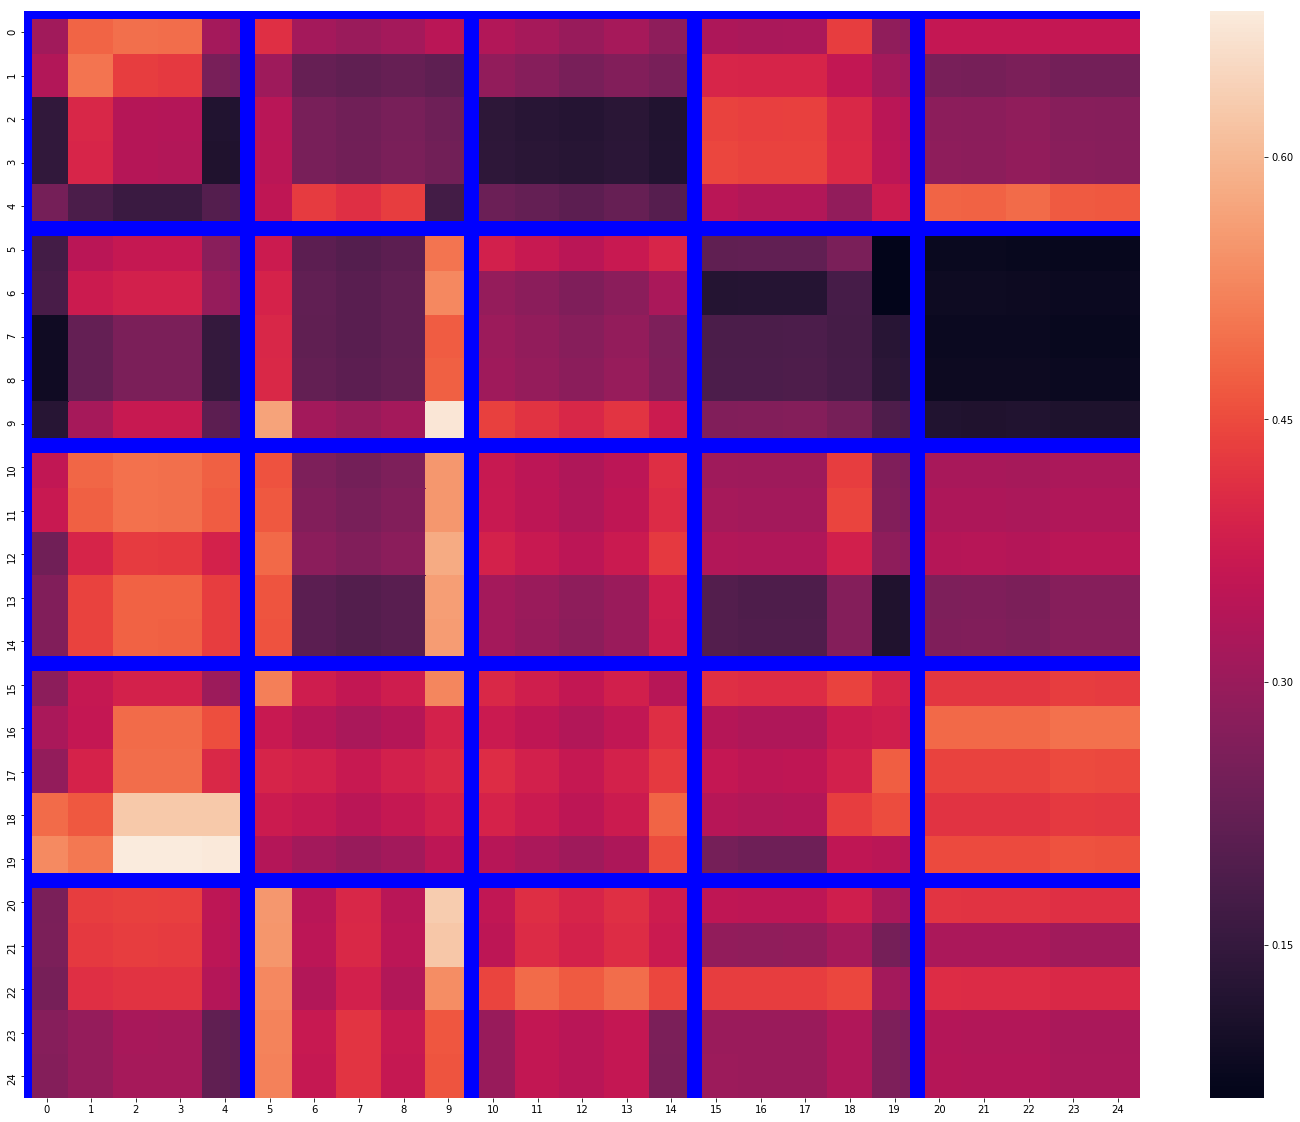

In [504]:
t1,matchSituation,tr=matchTwoVec(matchVector4,matchVector3)

### 随机匹配结果

In [490]:
for k in range(10):
    randRes=np.random.randint(5,size=25)
    count=0
    error=0
    for item in range(25):
        index1=int(item/5)
        index2=int(randRes[item])
        if index1==index2:
            count=count+1
        error=error+errorMatrix[index1,index2]
    print (count/25,error/25)

0.16 11.808674515635438
0.36 9.288674515635437
0.2 10.892605651996186
0.16 12.651046205272783
0.04 13.116651561089022
0.4 8.860941657500263
0.12 13.532361464677779
0.12 13.309860360454113
0.16 11.759511625363183
0.08 14.968430328317032
